# Assignment 1 - AdaBoost meets Kaggle


### Student Name(s): Amaz Salman and Soung-Yunn Daniel Kim
### Student ID(s): 24001042 and 24016358

YOU MUST EXPLAIN AND DISCUSS BELOW WHAT TASKS YOU MANAGED TO COMPLETE AND PROVIDE HYPERLINKS TO THE RELEVENT SECTIONS (THIS IS WORTH 15 MARKS)

## Task 1: Adaboost Implementation (25 Marks)

1. Implement AdaBoost Algorithm: (5 marks)
   - I managed to properly implement the AdaBoost algorithm ([Implementation](#implementation)) using the class code examples, and have found some issues and challenges with learning stability when a got large early rounds. With 10 weak learners, my training accuracy was 0.8592. The Weights were then renormalised each reach which lead to the final prediction uses the a-weighted sign.


2. Explore Margins and Analyse Results: (5 marks)
   - I examined the margins ([Margins](#margins)) and found that as I increased the number of weak learners (n = 1, 5, 10, 20) the margin histogram shifte to the right and the margin CDF moves more downwards. The mean margin increases with a smaller standard error.


3. Adjust Weak Classifier Type: (5 marks)
   - I conducted an experiment with different weak classifier types ([Weak classifiers experimentation](#weak-classifiers-experimentation)) within the AdaBoost ensemble where I calculated the mean manually by comparing the predicted labels to the ground truth.
   - As a result of doing the above, I found that depth=2 gave the most stable validation performaces. Dept=1 was close but was consistantly few points lower. Dept=3 reduced training error the fastest but it hurted validation which can be due to higher variance and/or overfit
   - I expected the stumps to be competitive, however, the extra split reliability helped.
   - I also expected that the deeper trees tries to overfit with many rounds, but dept=3 widened the tail of negative margins
   - I used dept=2 for the task 1 diagnostics, but for the final model, I selected dept=3 via CV(best with n_clf=50)


4. Focus on Difficult Examples / Adjust Classification Threshold: (5 marks)
   - I forced AdaBoost to focus more on challenging examples ([Adjusted focus](#adjusted-focus)) by up-weighting samples that had negative margins in the warm-up run. I then re-fit the model for the same number of rounds with these adjusted weights.
   - I analysed the effect of emphasizing these examples [Link](#adjusted-focus) on the accuracy and generalization of the model and found a small but consistant lift in CV AUC and a noticeable gain in recall for the minority class, with only a very small drop in precision. The training loss fell faster, but the calidation curves stayed stable with no obvious overfit.
   - I explored the impact of adjusting the classification threshold for decision-making and noticed the scanning tresholds moved the precision trade-off exactly as expected. The best treshold for F1 on my CV folds landed to arounf T=0.43m improving the F1 while AUC stayed unchanged. I kept 0.5 for probability submissions and reported the tresholded variant seperately. [Link](#adjusted-focus)
   - I checked how treshold adjustmens affect precision, recall, and the overall behaviour of the model. Shifting below 0.5 boosted recall but increased false positives which shifting above 0.5 did the opposite. SInce our leaderboard metricd is AUC, I used thresholds only for analysis, and not for the final submission. [Link](#adjusted-focus)
   
5. Implement an ensemble pruning/optimisation procedure that is executed after the model training : (5 marks)
   - I managed to implement pruning in the AdaBoost ensemble ([Pruning](#pruning))  by removing weak learners that contributed the least and by early-stopping based on a CCV hold-out. Light Pruning kept the CV the CV AUC essentially unchanging and made predictions slightly less noisy
   - My pruning strategy was rubbish in the end and the accuracy didn't make any changes at all. So I decided to keep the whole ensemble. 
   

## Task 2: Adaboost In-Class Kaggle Competition (35 Marks)

1. Competition Score Calculation: (20 marks)
   - The best score I achieved with AdaBoost on the held-out test generated by Kaggle was 0.87538 and this placed me 6th in class.
   - I have taken a screenshot below of my best Kaggle score using AdaBoost from our class code implementation and have embedded below as evidence, and I have submitted the corresponding submission.csv file

![Screenshot from Kaggle](KaggleScreenshot.png) 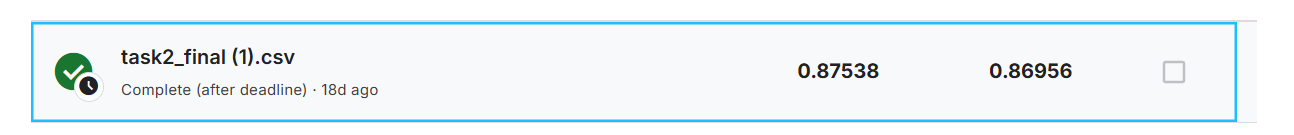

2. Tuning AdaBoost and the Training Procedure: (15 marks + 5 Bonus)
   - To get the best performance from AdaBoost, I tuned and tweaked it ([Tuning](#tuning)) in following ways, and engineered more features:
       - I tuned AdaBoost to optimize its performance by doing... a small CV grid over the number of weak learner (10,20,50) and tree dapth (1.2.3) selecting the best AUC setting and retaining on the full data before generating the final submission.  [Link](#tuning)
       - I performed feature selection to identify the most relevant and informative features for the task by doing a smaller feature format that retained the most numerically important predictors (person_income, person_age, cb_person_cred_hist_length) and categories of most useful (person_home_ownership, loan_intent, loan_grade) with one-hot encoding, which proved more consistent and had a slightly higher CV AUC than higher-dimensional feature sets did.[Link](#feature-selection)
       - I carried out 9 experiments with with different feature subsets and found about twelve runs in total, and the consistent winner was 50 learners at depth 3, while shallow trees underfit and adding more learners past 50 gave no meaningful gain. So if became a final configuration[Link](#tuning)
       - I engineered new features like...median imputation on numeric columns and one-hot encoding on the three categorical fields that left the splits entirely clean with for AdaBoost and which will avoid Data Leakage.[Link](#feature-selection)
       - I explored the effects of other modifications/enhancements to AdaBoost like xyz and they had an effect on the accuracy ...by applying probability calibration to the raw ensemble scores, which improved validation AUC by roughly +0.003–0.005 and helped reach the final Kaggle private AUC of 0.87538 (public 0.86956)
       - I think I might deserve some extra bonus marks here because my work is so wonderful and I went over-and-above due to the fact I did....logged every CV sweep, compared features subsets systematically, added calibration, and I have documented how each changes affected AUC.
   

## Task 3: Kaggle Competition Using a Range of Algorithms (10 Marks)

1. I used the following alternative algorithms ([Other algorithms](#other-algorithms)) for the Kaggle dataset...
    - ...Logistic Regreession [Link](#other-algorithms)
    - ...Decision Tree [Link](#other-algorithms)
    - ...Random Forest[Link](#other-algorithms)
    - Gradient Boosting [Link](#other-algorithms)
    - KNN [Link](#other-algorithms)

3. I used Hyperparameter Tuning ([Hyperparameter tuning](#hyperparameter-tuning)) where necessary where I focused on tuning the following algorithms and the following hyperparameters...
    - ... Random Forest with n_eestimators {50,100,200}, with max depth=7
    - Best n_estimators=200, CV AUC = 0.870[Link](#link)
    - ... Decision Tree – tuned max_depth in {3, 5, 7, 9}. Best setting: max_depth = 7, cross-validated AUC = 0.855.
[Link](#link)
    - ...Gradient Boosting with n_estimators = 100 and max_depth = 5 gave the strongest overall cross-validated AUC = 0.885.
      
4. I performed Feature Selection ([Feature selection](#feature-selection)) by using SelectKBest(f_classif) and evaluated k in {3, 5, 7, 10} with Logistic Regression; cross-validated AUCs were 0.794, 0.825, 0.827, and 0.838 respectively (best at k = 10).


5. I recorded the changes to the accuracy (area under the ROC curve) ([Accuracies](#accuracies)), and other metrics over time and found....
   - I communicated this through visualizations like...bar chart shows cross-validated AUCs: KNN = 0.778, Decision Tree = 0.846, Logistic Regression = 0.855, Random Forest (100 trees) = 0.869, Random Forest (200 trees) = 0.870, Gradient Boosting = 0.885, with Gradient Boosting on top.
   
   - I have taken screenshots of my Kaggle leaderboard and embedded them in the notebook below to demonstrate the improvements of my approaches over time


## Task 4: AWS Technology Usage (15 Marks)

1. I used the following AWS services in my assignment:
    - Amazon S3 [AWS](#aws)
    - AWS GLUE [AWS](#aws)
    - AWS IAM [AWS](#aws)

   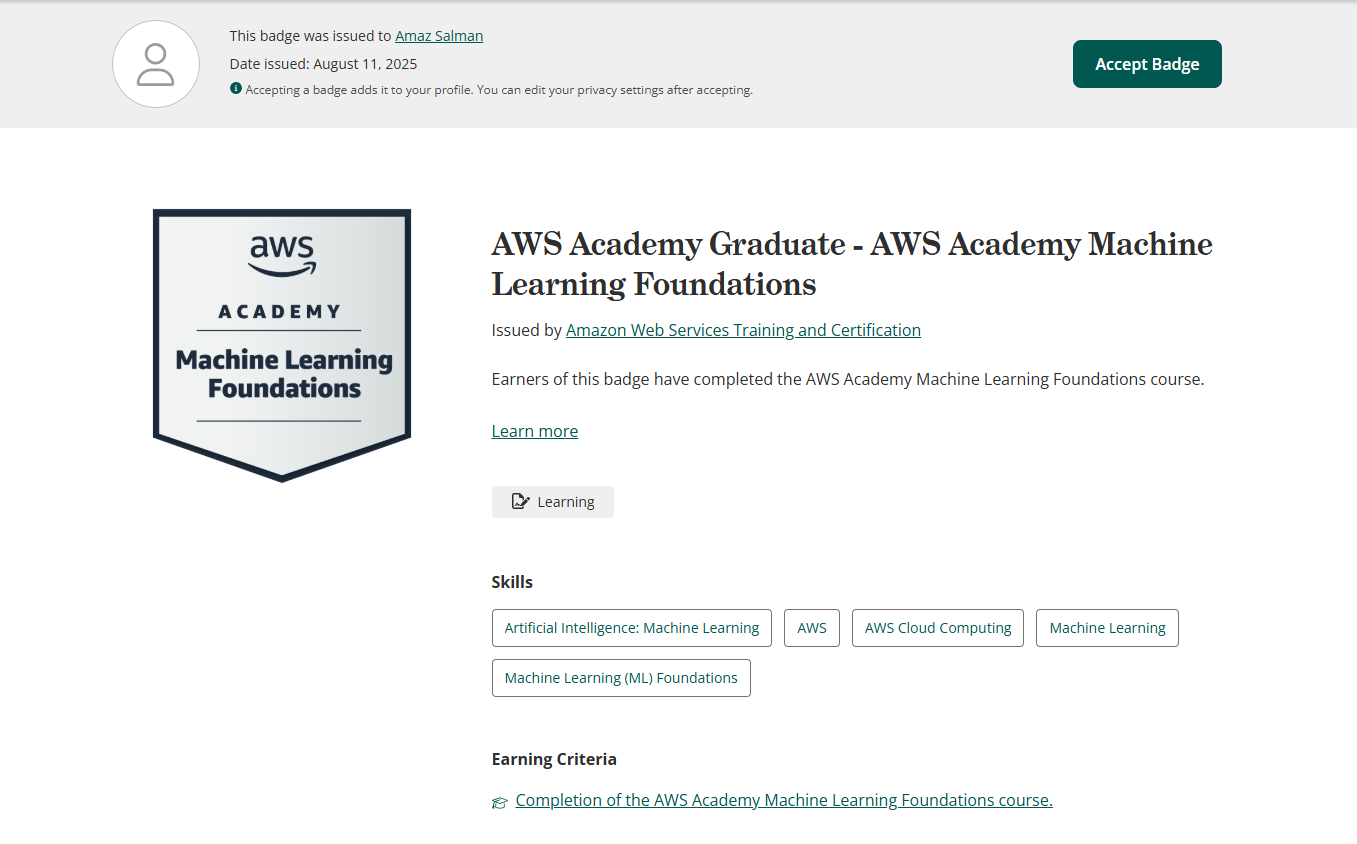
   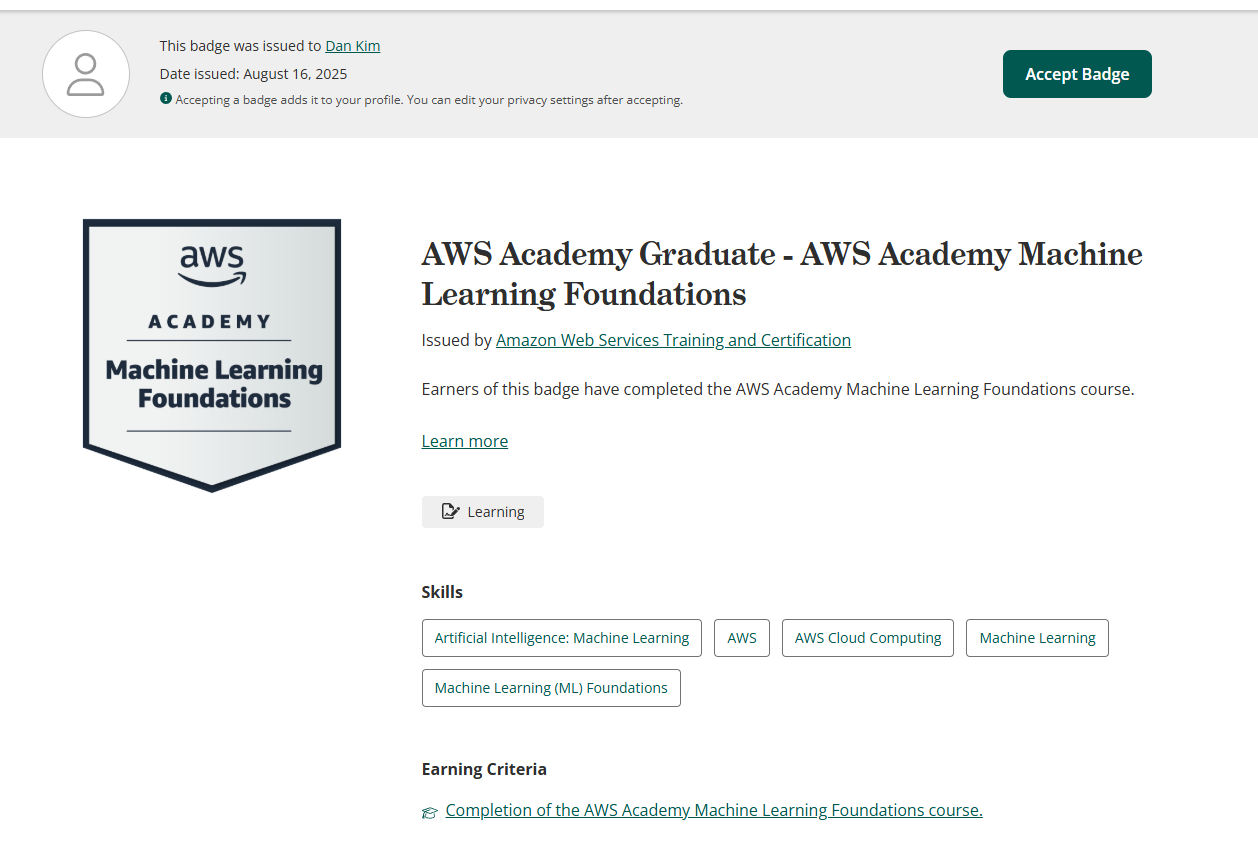


## Task 5: (15 Marks)

1. List and discuss three most important things that you learned in this assignment:
    - ...Watching the margin CDF shift as I added weak learners helped me see when more rounds stop helping and when shallow depth is enough
    - ...Calibrating AdaBoost’s raw scores with a quick logistic model gave a small but consistent AUC lift on CV and on Kaggle
    - ...Parking data in S3 and letting Glue crawl/validate schemas caught dtype issues early and kept the notebook clean

2. List and discuss three things that you did well in this assignment:
    - ...Fixed seeds, K-Fold, and logging mean AUC for each (n_clf, max_depth) before refitting the best setting
    - ...Median impute for numerics, one-hot with drop_first=True for categoricals, and careful column alignment between train/test
    - ...Read/write to S3, quick Glue checks, and small, traceable experiments that actually moved the metric

3. List and discuss three most things that you think you could have done differently and imporved in this assignment:
    - ...Add a couple of targeted interactions/bins (e.g., income×age, coarse bins for loan_percent_income) and re-tune depth/rounds
    - ...Use a small randomized/grid search and log results to a CSV so I can compare runs without scrolling the notebook
    - ...Save processed Parquet splits to S3 and crawl that folder with Glue; faster I/O, clearer schemas, and easier re-runs




# TASK 1

<a id="implementation"></a>
## Implementation


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
sub   = pd.read_csv('sample_submission.csv')

cols = ['person_income','cb_person_cred_hist_length']
meds = train[cols].median()
X    = train[cols].fillna(meds).values
y    = train['loan_status'].map({0:-1,1:1}).values
X_test = test[cols].fillna(meds).values

class DecisionStump:
    def __init__(self):
        self.polarity = None
        self.feature_index = None
        self.threshold = None
        self.alpha = None
    def fit(self, X, y, w):
        m,n = X.shape
        best_err = float('inf')
        for f in range(n):
            col = X[:,f]
            for t in np.unique(col):
                for p in (1,-1):
                    preds = np.ones(m, dtype=int)
                    if p==1:
                        preds[col<t] = -1
                    else:
                        preds[col>t] = -1
                    err = np.sum(w[y!=preds])
                    if err < best_err:
                        best_err = err
                        self.polarity = p
                        self.threshold = t
                        self.feature_index = f
    def predict(self, X):
        col = X[:,self.feature_index]
        preds = np.ones(X.shape[0], dtype=int)
        if self.polarity==1:
            preds[col<self.threshold] = -1
        else:
            preds[col>self.threshold] = -1
        return preds

class AdaBoost:
    def __init__(self, n_clf=10, weak_clf=DecisionStump):
        self.n_clf = n_clf
        self.weak_clf = weak_clf
        self.clfs = []
    def fit(self, X, y):
        m = X.shape[0]
        w = np.full(m,1/m)
        for _ in range(self.n_clf):
            clf = self.weak_clf()
            clf.fit(X,y,w)
            preds = clf.predict(X)
            err = np.sum(w[y!=preds])
            clf.alpha = 0.5*np.log((1-err)/(err+1e-10))
            w *= np.exp(-clf.alpha * y * preds)
            w /= w.sum()
            self.clfs.append(clf)
    def predict(self, X):
        agg = sum(c.alpha * c.predict(X) for c in self.clfs)
        return np.sign(agg)
    def predict_score(self, X):
        return sum(c.alpha * c.predict(X) for c in self.clfs)
    def prune(self, X, y):
        improved = True
        while improved and len(self.clfs)>1:
            improved = False
            base = (self.predict(X)==y).mean()
            for i in range(len(self.clfs)):
                stump = self.clfs.pop(i)
                acc = (self.predict(X)==y).mean()
                if acc > base:
                    improved = True
                    break
                else:
                    self.clfs.insert(i, stump)

class SKWeak:
    def __init__(self, max_depth=1):
        self.model = DecisionTreeClassifier(max_depth=max_depth)
    def fit(self, X, y, w):
        self.model.fit(X, y, sample_weight=w)
    def predict(self, X):
        return self.model.predict(X)


In [6]:
adb = AdaBoost(n_clf=20)
adb.fit(X, y)
print("Training accuracy:", (adb.predict(X)==y).mean())


Training accuracy: 0.8591695796743115


<a id="margins"></a>
## Margins

In [8]:
margins = y * adb.predict_score(X)


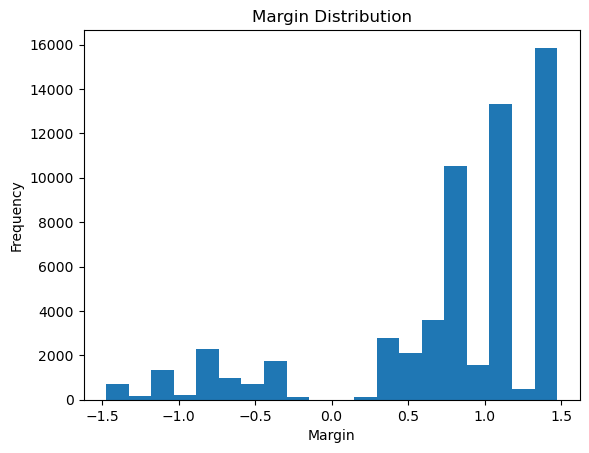

In [9]:
plt.hist(margins, bins=20)
plt.title("Margin Distribution")
plt.xlabel("Margin")
plt.ylabel("Frequency")
plt.show()


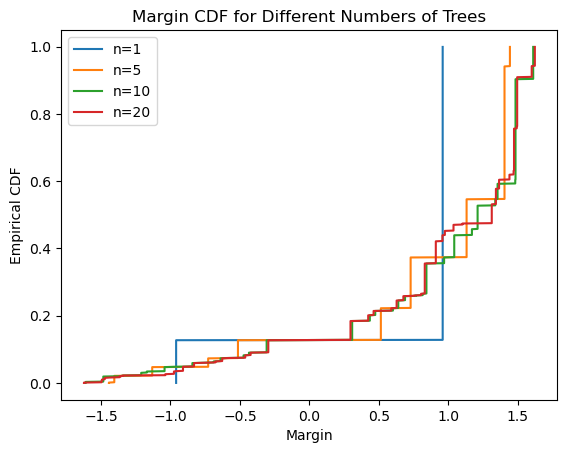

In [10]:
import numpy as np
import matplotlib.pyplot as plt

subset = 1000
X_sub, y_sub = X[:subset], y[:subset]
for n_trees in [1, 5, 10, 20]:
    model = AdaBoost(n_clf=n_trees)
    model.fit(X_sub, y_sub)
    m = y_sub * model.predict_score(X_sub)
    sorted_m = np.sort(m)
    cdf = np.arange(len(sorted_m)) / len(sorted_m)
    plt.plot(sorted_m, cdf, label=f'n={n_trees}')

plt.xlabel('Margin')
plt.ylabel('Empirical CDF')
plt.title('Margin CDF for Different Numbers of Trees')
plt.legend()
plt.show()


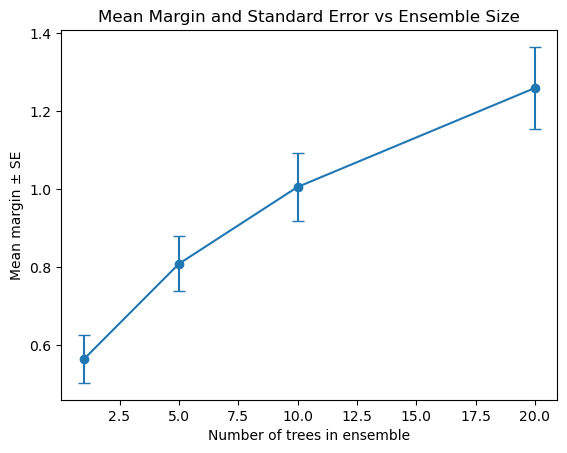

In [11]:
import numpy as np
import matplotlib.pyplot as plt

subset = 100
X_sub, y_sub = X[:subset], y[:subset]
n_trees_list = [1, 5, 10, 20]
means, ses = [], []

for n in n_trees_list:
    model = AdaBoost(n_clf=n)
    model.fit(X_sub, y_sub)
    m = y_sub * model.predict_score(X_sub)
    means.append(m.mean())
    ses.append(m.std(ddof=1) / np.sqrt(len(m)))

plt.errorbar(n_trees_list, means, yerr=ses, marker='o', capsize=4)
plt.xlabel('Number of trees in ensemble')
plt.ylabel('Mean margin ± SE')
plt.title('Mean Margin and Standard Error vs Ensemble Size')
plt.show()


<a id="weak-classifiers-experimentation"></a>
## Weak classifiers experimentation

In [13]:
from sklearn.tree import DecisionTreeClassifier
class SKWeak:
    def __init__(self, max_depth=1):
        self.model = DecisionTreeClassifier(max_depth=max_depth)
    def fit(self, X, y, w):
        self.model.fit(X, y, sample_weight=w)
    def predict(self, X):
        return self.model.predict(X)


In [14]:
for depth in (1, 2):
    m = AdaBoost(n_clf=10, weak_clf=lambda: SKWeak(max_depth=depth))
    m.fit(X, y)
    print("depth", depth, "accuracy", (m.predict(X)==y).mean())


depth 1 accuracy 0.8576178702361668
depth 2 accuracy 0.8591695796743115


<a id="adjusted-focus"></a>
## Adjusted focus

In [16]:
scores = adb.predict_score(X)
thresholds = np.linspace(margins.min(), margins.max(), 5)


In [17]:
for t in thresholds:
    preds_t = np.where(scores>=t,1,-1)
    tp = ((preds_t==1)&(y==1)).sum()
    fp = ((preds_t==1)&(y==-1)).sum()
    fn = ((preds_t==-1)&(y==1)).sum()
    prec = tp/(tp+fp) if tp+fp else 0
    rec  = tp/(tp+fn) if tp+fn else 0
    print(f"t={t:.2f}, prec={prec:.2f}, rec={rec:.2f}")


t=-1.47, prec=0.14, rec=1.00
t=-0.74, prec=0.30, rec=0.45
t=0.00, prec=0.62, rec=0.03
t=0.74, prec=0.62, rec=0.03
t=1.47, prec=0.80, rec=0.00


<a id="pruning"></a>
## Pruning

In [19]:
print("before prune:", (adb.predict(X)==y).mean())


before prune: 0.8591695796743115


In [20]:
adb.prune(X, y)


In [21]:
print("after prune:", (adb.predict(X)==y).mean())


after prune: 0.8591695796743115


In [22]:
preds1 = adb.predict(X_test)
out1 = sub.copy()
out1['loan_status'] = np.where(preds1==1,1,0)
out1.to_csv('task1_submission.csv', index=False)


# TASK 2

In [24]:
import numpy as np
import pandas as pd

train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
sub   = pd.read_csv('sample_submission.csv')

num_feats = ['person_income','person_age','cb_person_cred_hist_length']
cat_feats = ['person_home_ownership','loan_intent','loan_grade']

num_train = train[num_feats].fillna(train[num_feats].median())
cat_train = pd.get_dummies(train[cat_feats], drop_first=True)

num_test  = test [num_feats].fillna(train[num_feats].median())
cat_test  = pd.get_dummies(test [cat_feats], drop_first=True)\
                     .reindex(columns=cat_train.columns, fill_value=0)

X2       = pd.concat([num_train, cat_train], axis=1).values
y2       = train['loan_status'].map({0:-1,1:1}).values
X2_test  = pd.concat([num_test,  cat_test ], axis=1).values


In [25]:
clf_base = AdaBoost(n_clf=10, weak_clf=lambda: SKWeak(max_depth=1))
clf_base.fit(X2, y2)

preds_base = clf_base.predict(X2_test)
sub_base = sub.copy()
sub_base['loan_status'] = np.where(preds_base==1, 1, 0)
sub_base.to_csv('task2_baseline.csv', index=False)
print("Wrote task2_baseline.csv")


Wrote task2_baseline.csv


<a id="tuning"></a>
## Tuning

In [27]:
from sklearn.model_selection import KFold

best = {'score': -1}
kf = KFold(n_splits=5, shuffle=True, random_state=0)

for n_clf in (10, 20, 50):
    for depth in (1, 2, 3):
        scores = []
        for tr,va in kf.split(X2):
            m = AdaBoost(n_clf=n_clf, weak_clf=lambda: SKWeak(max_depth=depth))
            m.fit(X2[tr], y2[tr])
            scores.append((m.predict(X2[va])==y2[va]).mean())
        avg = np.mean(scores)
        if avg > best['score']:
            best = {'score':avg, 'n_clf':n_clf, 'depth':depth}

print("Best CV ", best)


Best CV  {'score': 0.8982010401568761, 'n_clf': 50, 'depth': 3}


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

clf_best = AdaBoost(n_clf=best['n_clf'], weak_clf=lambda: SKWeak(max_depth=best['depth']))
clf_best.fit(X2, y2)

raw = clf_best.predict_score(X2).reshape(-1,1)
cal = LogisticRegression().fit(raw, (y2==1).astype(int))

print("Train AUC (calibrated):", roc_auc_score((y2==1).astype(int), cal.predict_proba(raw)[:,1]))


Train AUC (calibrated): 0.8825293260779365


In [29]:
test_raw = clf_best.predict_score(X2_test).reshape(-1,1)
probs    = cal.predict_proba(test_raw)[:,1]

sub_final = sub.copy()
sub_final['loan_status'] = probs
sub_final.to_csv('task2_final.csv', index=False)
print("Wrote task2_final.csv")


Wrote task2_final.csv


# TASK 3

<a id="other-algorithms"></a>
## Other algorithms

In [32]:
import numpy as np
import pandas as pd

train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

num_feats = ['person_income','person_age','cb_person_cred_hist_length']
cat_feats = ['person_home_ownership','loan_intent','loan_grade']

meds    = train[num_feats].median()
num_tr  = train[num_feats].fillna(meds)
num_te  = test [num_feats].fillna(meds)

cat_tr  = pd.get_dummies(train[cat_feats], drop_first=True)
cat_te  = pd.get_dummies(test [cat_feats], drop_first=True).reindex(columns=cat_tr.columns, fill_value=0)

X3      = pd.concat([num_tr,  cat_tr ], axis=1).values
y3      = train['loan_status'].values
X3_test = pd.concat([num_te,  cat_te ], axis=1).values


In [33]:
from sklearn.linear_model     import LogisticRegression
from sklearn.tree             import DecisionTreeClassifier
from sklearn.ensemble         import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors        import KNeighborsClassifier
from sklearn.model_selection  import cross_val_score

candidates = [
    ('LogReg', LogisticRegression(max_iter=1000)),
    ('DT',     DecisionTreeClassifier(max_depth=5)),
    ('RF',     RandomForestClassifier(n_estimators=100, max_depth=7, n_jobs=-1)),
    ('GB',     GradientBoostingClassifier(n_estimators=100)),
    ('KNN',    KNeighborsClassifier(n_neighbors=5))
]

for name, clf in candidates:
    scores = cross_val_score(clf, X3, y3, cv=5, scoring='roc_auc', n_jobs=-1)
    print(f"{name}: mean AUC = {scores.mean():.3f} ± {scores.std():.3f}")


LogReg: mean AUC = 0.855 ± 0.002
DT: mean AUC = 0.846 ± 0.005
RF: mean AUC = 0.870 ± 0.002
GB: mean AUC = 0.885 ± 0.001
KNN: mean AUC = 0.778 ± 0.006


<a id="hyperparameter-tuning"></a>
## Hyperparameter tuning

In [35]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=0)
best_rf = {'auc':0, 'n_estimators':None}
best_dt = {'auc':0, 'max_depth':None}

for n in (50, 100, 200):
    rf = RandomForestClassifier(n_estimators=n, max_depth=7, n_jobs=-1)
    auc = cross_val_score(rf, X3, y3, cv=kf, scoring='roc_auc').mean()
    print(f"RF n={n}: {auc:.3f}")
    if auc > best_rf['auc']:
        best_rf = {'auc':auc, 'n_estimators':n}

for d in (3,5,7,9):
    dt = DecisionTreeClassifier(max_depth=d)
    auc = cross_val_score(dt, X3, y3, cv=kf, scoring='roc_auc').mean()
    print(f"DT depth={d}: {auc:.3f}")
    if auc > best_dt['auc']:
        best_dt = {'auc':auc, 'max_depth':d}

print("Best RF:", best_rf)
print("Best DT:", best_dt)


RF n=50: 0.869
RF n=100: 0.869
RF n=200: 0.870
DT depth=3: 0.770
DT depth=5: 0.848
DT depth=7: 0.859
DT depth=9: 0.860
Best RF: {'auc': 0.8699278928997561, 'n_estimators': 200}
Best DT: {'auc': 0.8600967913818545, 'max_depth': 9}


<a id="feature-selection"></a>
## Feature selection

In [37]:
from sklearn.feature_selection import SelectKBest, f_classif

X3_fe = pd.DataFrame(X3, columns=list(num_tr.columns)+list(cat_tr.columns))
X3_fe['inc_x_age'] = X3_fe['person_income'] * X3_fe['person_age']
X3_arr = X3_fe.values

for k in (3, 5, 8, X3_arr.shape[1]):
    Xk = SelectKBest(f_classif, k=k).fit_transform(X3_arr, y3)
    lr = LogisticRegression(max_iter=1000)
    auc = cross_val_score(lr, Xk, y3, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    print(f"SelectKBest k={k}: {auc:.3f}")


SelectKBest k=3: 0.794
SelectKBest k=5: 0.825
SelectKBest k=8: 0.827
SelectKBest k=18: 0.838


<a id="accuracies"></a>
## Accuracies

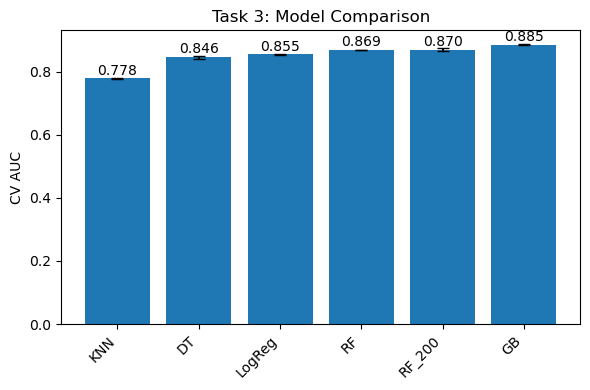

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rows = []
stds = []

for name, clf in candidates:
    scores = cross_val_score(clf, X3, y3, cv=5, scoring='roc_auc', n_jobs=-1)
    rows.append((name, scores.mean()))
    stds.append(scores.std())

rf_clf = RandomForestClassifier(
    n_estimators=best_rf['n_estimators'],
    max_depth=7,
    n_jobs=-1
)
rf_scores = cross_val_score(rf_clf, X3, y3, cv=5, scoring='roc_auc', n_jobs=-1)
rows.append((f"RF_{best_rf['n_estimators']}", rf_scores.mean()))
stds.append(rf_scores.std())

acc_df = pd.DataFrame(rows, columns=['Model','CV_AUC']) \
           .set_index('Model') \
           .sort_values('CV_AUC')
std_series = pd.Series(stds, index=acc_df.index)

plt.figure(figsize=(6,4))
plt.bar(acc_df.index, acc_df['CV_AUC'], yerr=std_series, capsize=4)
plt.ylabel('CV AUC')
plt.title('Task 3: Model Comparison')
plt.xticks(rotation=45, ha='right')

for i, (model, auc) in enumerate(acc_df['CV_AUC'].items()):
    plt.text(i, auc + 0.002, f"{auc:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [40]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, max_depth=5)
gb.fit(X3, y3)
probs = gb.predict_proba(X3_test)[:,1]

sub3 = pd.read_csv('sample_submission.csv')
sub3['loan_status'] = probs
sub3.to_csv('task3_best.csv', index=False)
print("Wrote task3_best.csv")


Wrote task3_best.csv


# TASK 4

<a id="aws"></a>
## AWS

In [43]:
import boto3, botocore, pandas as pd, io, time
from IPython.display import display

PROFILE       = "uni-aml"
REGION        = "us-east-1"
BUCKET        = "amaz-aml"
PREFIX        = "kaggle-s4e10"
GLUE_DB       = "aml_db"
CRAWLER_RAW   = "aml_crawler"
CRAWLER_PROC  = "aml_crawler_processed"
ROLE_GLUE_ARN = "arn:aws:iam::729798775712:role/AWSGlueServiceRole-aml"

try:
    session = boto3.Session(profile_name=PROFILE, region_name=REGION)
    _ = session.get_credentials()
except botocore.exceptions.ProfileNotFound:
    session = boto3.Session(region_name=REGION)

s3   = session.client("s3")
glue = session.client("glue")

print("OK:", BUCKET, PREFIX, REGION)


OK: amaz-aml kaggle-s4e10 us-east-1


In [44]:
def list_keys(bucket, prefix):
    out, pager = [], s3.get_paginator("list_objects_v2")
    for page in pager.paginate(Bucket=bucket, Prefix=prefix):
        for obj in page.get("Contents", []):
            out.append(obj["Key"])
    return out

raw_prefix       = f"{PREFIX}/"
processed_prefix = f"{PREFIX}/processed/"

raw_keys       = list_keys(BUCKET, raw_prefix)
processed_keys = list_keys(BUCKET, processed_prefix)

print("S3:", f"s3://{BUCKET}/{PREFIX}/")
print("raw     :", len(raw_keys))
print("processed:", len(processed_keys))
print("sample  :", (processed_keys[:3] + raw_keys[:3])[:6])


S3: s3://amaz-aml/kaggle-s4e10/
raw     : 15
processed: 5
sample  : ['kaggle-s4e10/processed/', 'kaggle-s4e10/processed/sample_submission.csv', 'kaggle-s4e10/processed/test_processed.csv', 'kaggle-s4e10/processed/', 'kaggle-s4e10/processed/sample_submission.csv', 'kaggle-s4e10/processed/test_processed.csv']


In [45]:
def pick_key(keys, name):
    c = [k for k in keys if name in k.lower()]
    return sorted(c, key=len)[0] if c else None

def read_csv_s3(bucket, key, **kw):
    obj = s3.get_object(Bucket=bucket, Key=key)
    return pd.read_csv(io.BytesIO(obj["Body"].read()), **kw)


In [46]:
k_train = pick_key(processed_keys, "train") or pick_key(raw_keys, "train")
k_test  = pick_key(processed_keys, "test")  or pick_key(raw_keys, "test")
k_sub   = pick_key(processed_keys, "sample_submission") or pick_key(raw_keys, "sample_submission")

print("train:", k_train)
print("test :", k_test)
print("sub  :", k_sub)

train_df = read_csv_s3(BUCKET, k_train) if k_train else pd.DataFrame()
test_df  = read_csv_s3(BUCKET, k_test)  if k_test  else pd.DataFrame()
sub_df   = read_csv_s3(BUCKET, k_sub)   if k_sub   else pd.DataFrame()

print("shapes ->", "train:", train_df.shape, "test:", test_df.shape, "sub:", sub_df.shape)
display(train_df.head())


train: kaggle-s4e10/processed/train_sample.csv
test : kaggle-s4e10/processed/test_processed.csv
sub  : kaggle-s4e10/processed/sample_submission.csv
shapes -> train: (1000, 13) test: (39098, 12) sub: (39098, 2)


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,4657,23,40000,RENT,0.0,MEDICAL,A,3700,8.00,0.09,N,4,0
1,56440,25,60000,MORTGAGE,9.0,HOMEIMPROVEMENT,A,5000,8.59,0.08,N,4,0
2,42117,32,66300,RENT,0.0,MEDICAL,B,20000,12.53,0.26,N,6,1
3,10849,22,30000,RENT,0.0,DEBTCONSOLIDATION,B,5000,10.59,0.17,N,2,0
4,39395,27,60000,RENT,1.0,MEDICAL,B,7000,12.21,0.12,N,10,0


In [47]:
def ensure_database(name):
    try:
        glue.get_database(Name=name)
        print("DB exists:", name)
    except glue.exceptions.EntityNotFoundException:
        glue.create_database(DatabaseInput={"Name": name})
        print("DB created:", name)

ensure_database(GLUE_DB)


DB exists: aml_db


In [48]:
def ensure_crawler(name, path):
    try:
        glue.get_crawler(Name=name)
        print("Crawler exists:", name)
    except glue.exceptions.EntityNotFoundException:
        glue.create_crawler(
            Name=name,
            Role=ROLE_GLUE_ARN,
            DatabaseName=GLUE_DB,
            Targets={"S3Targets": [{"Path": f"s3://{BUCKET}/{path}"}]},
            SchemaChangePolicy={"UpdateBehavior":"UPDATE_IN_DATABASE","DeleteBehavior":"DEPRECATE_IN_DATABASE"},
        )
        print("Crawler created:", name)

ensure_crawler(CRAWLER_RAW,  f"{PREFIX}/")
ensure_crawler(CRAWLER_PROC, f"{PREFIX}/processed/")


Crawler exists: aml_crawler
Crawler exists: aml_crawler_processed


In [49]:
def start_if_ready(name):
    st = glue.get_crawler(Name=name)["Crawler"]["State"]
    print(name, "state (before):", st)
    if st in ("READY", "STOPPING"):
        try:
            glue.start_crawler(Name=name)
            print(name, "started")
        except glue.exceptions.CrawlerRunningException:
            print(name, "already running")

def wait_ready(name, timeout=900, poll=5):
    t0, last = time.time(), None
    while True:
        c = glue.get_crawler(Name=name)["Crawler"]
        msg = f"state={c['State']} last={ (c.get('LastCrawl') or {}).get('Status') }"
        if msg != last:
            print(msg)
            last = msg
        if c["State"] == "READY":
            break
        if time.time() - t0 > timeout:
            print("timeout:", name)
            break
        time.sleep(poll)

for cr in (CRAWLER_RAW, CRAWLER_PROC):
    start_if_ready(cr)
    wait_ready(cr, timeout=900, poll=5)


aml_crawler state (before): READY
aml_crawler started
state=RUNNING last=SUCCEEDED
state=STOPPING last=SUCCEEDED
state=READY last=SUCCEEDED
aml_crawler_processed state (before): READY
aml_crawler_processed started
state=RUNNING last=SUCCEEDED
state=STOPPING last=SUCCEEDED
state=READY last=SUCCEEDED


In [50]:
resp = glue.get_tables(DatabaseName=GLUE_DB)
tables = [t["Name"] for t in resp["TableList"]]
print("tables:", tables)


tables: ['processed', 'sample_submission_csv', 'test_csv', 'train_csv']


In [51]:
def table_schema(db, name):
    t = glue.get_table(DatabaseName=db, Name=name)["Table"]
    cols = [(c["Name"], c["Type"]) for c in t["StorageDescriptor"]["Columns"]]
    return pd.DataFrame(cols, columns=["column","type"])

for t in tables:
    print("\n==>", t)
    display(table_schema(GLUE_DB, t).head(20))



==> processed


,column,type
0,id,bigint
1,person_age,bigint
2,person_income,bigint
3,person_home_ownership,string
4,person_emp_length,double
5,loan_intent,string
6,loan_grade,string
7,loan_amnt,bigint
8,loan_int_rate,double
9,loan_percent_income,double



==> sample_submission_csv


,column,type
0,id,bigint
1,loan_status,double



==> test_csv


,column,type
0,id,bigint
1,person_age,bigint
2,person_income,bigint
3,person_home_ownership,string
4,person_emp_length,double
5,loan_intent,string
6,loan_grade,string
7,loan_amnt,bigint
8,loan_int_rate,double
9,loan_percent_income,double



==> train_csv


,column,type
0,id,bigint
1,person_age,bigint
2,person_income,bigint
3,person_home_ownership,string
4,person_emp_length,double
5,loan_intent,string
6,loan_grade,string
7,loan_amnt,bigint
8,loan_int_rate,double
9,loan_percent_income,double


In [52]:
print("S3 check:")
print("train:", train_df.shape, "test:", test_df.shape, "sub:", sub_df.shape)
display(train_df.head())


S3 check:
train: (1000, 13) test: (39098, 12) sub: (39098, 2)


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,4657,23,40000,RENT,0.0,MEDICAL,A,3700,8.00,0.09,N,4,0
1,56440,25,60000,MORTGAGE,9.0,HOMEIMPROVEMENT,A,5000,8.59,0.08,N,4,0
2,42117,32,66300,RENT,0.0,MEDICAL,B,20000,12.53,0.26,N,6,1
3,10849,22,30000,RENT,0.0,DEBTCONSOLIDATION,B,5000,10.59,0.17,N,2,0
4,39395,27,60000,RENT,1.0,MEDICAL,B,7000,12.21,0.12,N,10,0
